In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
corona= pd.read_csv('worldometer_coronavirus_daily_data.csv')
corona.head()

date      country  cumulative_total_cases  daily_new_cases  \
0  2020-2-15  Afghanistan                     0.0              NaN   
1  2020-2-16  Afghanistan                     0.0              NaN   
2  2020-2-17  Afghanistan                     0.0              NaN   
3  2020-2-18  Afghanistan                     0.0              NaN   
4  2020-2-19  Afghanistan                     0.0              NaN   

   active_cases  cumulative_total_deaths  daily_new_deaths  
0           0.0                      0.0               NaN  
1           0.0                      0.0               NaN  
2           0.0                      0.0               NaN  
3           0.0                      0.0               NaN  
4           0.0                      0.0               NaN

In [3]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117064 entries, 0 to 117063
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     117064 non-null  object 
 1   country                  117064 non-null  object 
 2   cumulative_total_cases   117064 non-null  float64
 3   daily_new_cases          110191 non-null  float64
 4   active_cases             116532 non-null  float64
 5   cumulative_total_deaths  110148 non-null  float64
 6   daily_new_deaths         96221 non-null   float64
dtypes: float64(5), object(2)
memory usage: 6.3+ MB


In [4]:
corona.isna().sum()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             6873
active_cases                 532
cumulative_total_deaths     6916
daily_new_deaths           20843
dtype: int64

In [5]:
corona['date'] = pd.to_datetime(corona['date'])
corona.head()

date      country  cumulative_total_cases  daily_new_cases  \
0 2020-02-15  Afghanistan                     0.0              NaN   
1 2020-02-16  Afghanistan                     0.0              NaN   
2 2020-02-17  Afghanistan                     0.0              NaN   
3 2020-02-18  Afghanistan                     0.0              NaN   
4 2020-02-19  Afghanistan                     0.0              NaN   

   active_cases  cumulative_total_deaths  daily_new_deaths  
0           0.0                      0.0               NaN  
1           0.0                      0.0               NaN  
2           0.0                      0.0               NaN  
3           0.0                      0.0               NaN  
4           0.0                      0.0               NaN

In [6]:
summary= pd.read_csv('worldometer_coronavirus_summary_data.csv')
summary.head()

country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia           147473        6736.0          98073.0   
1      Albania    Europe           133081        2457.0         130222.0   
2      Algeria    Africa           171392        4254.0         115276.0   
3      Andorra    Europe            14678         128.0          14210.0   
4       Angola    Africa            42646        1008.0          36708.0   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0       42664.0               1124.0                           3699   
1         402.0                  3.0                          46299   
2       51862.0                 47.0                           3834   
3         340.0                  NaN                         189643   
4        4930.0                  8.0                           1256   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0                           169.0     707244.0                        17739.0   
1                           855.0     916777.0                       318945.0   
2                            95.0     230861.0                         5164.0   
3                          1654.0     193595.0                      2501292.0   
4                            30.0     681443.0                        20065.0   

   population  
0    39869084  
1     2874408  
2    44701619  
3       77398  
4    33961015

In [7]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    207 non-null    float64
 4   total_recovered                 219 non-null    float64
 5   active_cases                    219 non-null    float64
 6   serious_or_critical             146 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  204 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [8]:
summary.isna().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                      13
total_recovered                    1
active_cases                       1
serious_or_critical               74
total_cases_per_1m_population      0
total_deaths_per_1m_population    16
total_tests                       10
total_tests_per_1m_population     10
population                         0
dtype: int64

In [9]:
summary['total_confirmed']= summary.groupby('country').total_confirmed.tail(1)
summary.groupby('country')['total_confirmed'].mean().sort_values(ascending=False).head(20)

country
USA             35733967.0
India           31654584.0
Brazil          19917855.0
Russia           6265873.0
France           6127019.0
UK               5856528.0
Turkey           5727045.0
Argentina        4929764.0
Colombia         4785320.0
Spain            4447044.0
Italy            4350028.0
Iran             3871008.0
Germany          3776721.0
Indonesia        3409658.0
Poland           2882939.0
Mexico           2829443.0
South Africa     2447454.0
Ukraine          2252785.0
Peru             2109294.0
Netherlands      1865511.0
Name: total_confirmed, dtype: float64

In [10]:
covid_death_top_20 = summary[['country','total_deaths_per_1m_population','continent']].dropna().sort_values('total_deaths_per_1m_population')[-20:]
covid_death_top_20

country  total_deaths_per_1m_population      continent
206                      UK                          1899.0         Europe
155                  Poland                          1991.0         Europe
50                  Croatia                          2025.0         Europe
152                Paraguay                          2066.0  South America
100                   Italy                          2121.0         Europe
180                Slovenia                          2130.0         Europe
18                  Belgium                          2168.0         Europe
179                Slovakia                          2296.0         Europe
7                 Argentina                          2316.0  South America
45                 Colombia                          2346.0  South America
134              Montenegro                          2595.0         Europe
26                   Brazil                          2598.0  South America
117               Macedonia                          2637.0         Europe
29                 Bulgaria                          2642.0         Europe
170              San Marino                          2646.0         Europe
79                Gibraltar                          2791.0         Europe
54           Czech Republic                          2831.0         Europe
24   Bosnia And Herzegovina                          2973.0         Europe
91                  Hungary                          3117.0         Europe
153                    Peru                          5865.0  South America

In [11]:
summary['active_cases']= summary.groupby("country").active_cases.tail(1)
summary.groupby('country')['active_cases'].mean().sort_values(ascending=False).head(20)

country
USA             5438593.0
UK              1218224.0
Brazil           741943.0
Spain            654358.0
Indonesia        545447.0
Russia           498691.0
India            417327.0
Iran             413106.0
Mexico           384878.0
France           314337.0
Argentina        254491.0
Turkey           221353.0
Thailand         200510.0
Malaysia         189609.0
Honduras         188580.0
Netherlands      179680.0
Poland           153978.0
South Africa     153103.0
Bangladesh       150587.0
Iraq             143669.0
Name: active_cases, dtype: float64

Total people tested till now:

In [12]:
summary['total_tests']= summary.groupby("country").total_tests.tail(1)
summary.groupby("country")['total_tests'].mean().sort_values(ascending=False).head(20)

country
USA                     529577328.0
India                   466427038.0
UK                      244114700.0
Russia                  165300000.0
China                   160000000.0
France                  104611244.0
Italy                    77544194.0
Denmark                  76232150.0
Turkey                   67868851.0
Germany                  67083026.0
Austria                  66567305.0
United Arab Emirates     65922553.0
Spain                    55855941.0
Brazil                   55034721.0
Canada                   38466868.0
Czech Republic           32954689.0
Indonesia                26301202.0
Iran                     25857430.0
Saudi Arabia             25029275.0
Australia                25012386.0
Name: total_tests, dtype: float64

In [13]:
summary.iloc[:,:].corr().style.background_gradient(cmap='Reds').format("{:.3f}")


Vaccinations study:

In [14]:
df= pd.read_csv('country_vaccination.csv')
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              38644 non-null  object 
 1   iso_code                             38644 non-null  object 
 2   date                                 38644 non-null  object 
 3   total_vaccinations                   21254 non-null  float64
 4   people_vaccinated                    20314 non-null  float64
 5   people_fully_vaccinated              17437 non-null  float64
 6   daily_vaccinations_raw               17461 non-null  float64
 7   daily_vaccinations                   38393 non-null  float64
 8   total_vaccinations_per_hundred       21254 non-null  float64
 9   people_vaccinated_per_hundred        20314 non-null  float64
 10  people_fully_vaccinated_per_hundred  17437 non-null  float64
 11  daily_vaccinations_per_milli

In [16]:
df.shape

(38644, 15)

In [17]:
df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     17390
people_vaccinated                      18330
people_fully_vaccinated                21207
daily_vaccinations_raw                 21183
daily_vaccinations                       251
total_vaccinations_per_hundred         17390
people_vaccinated_per_hundred          18330
people_fully_vaccinated_per_hundred    21207
daily_vaccinations_per_million           251
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [18]:
from datetime import datetime, timedelta
now=datetime.utcnow()-timedelta(hours=15)
today=now.strftime('%Y-%m-%d')
print(f"Today's data is { today}.")

Today's data is 2023-04-01.


Counrties with high vaccinations issued:

In [19]:
df['total_vaccinations(count)']=df.groupby("country").total_vaccinations.tail(1)
df.groupby("country")['total_vaccinations(count)'].mean().sort_values(ascending=False).head(20)

country
China             1.900127e+09
India             5.621515e+08
United States     3.585998e+08
Brazil            1.681576e+08
Japan             1.146644e+08
Germany           9.870606e+07
United Kingdom    8.840109e+07
Turkey            8.641372e+07
Indonesia         8.459584e+07
France            8.186213e+07
Mexico            7.876507e+07
Italy             7.455609e+07
Russia            7.442586e+07
England           7.398216e+07
Spain             6.219314e+07
Canada            5.193619e+07
Pakistan          4.473698e+07
Argentina         3.723452e+07
Poland            3.552898e+07
South Korea       3.398867e+07
Name: total_vaccinations(count), dtype: float64

In [20]:
daily_vaccinations_per_million =df.groupby("country").daily_vaccinations_per_million.max().sort_values(ascending=False).head(20)
daily_vaccinations_per_million

country
Bhutan               118759.0
Falkland Islands      54264.0
Niue                  53770.0
Nauru                 51689.0
Cook Islands          46231.0
Mongolia              38271.0
Gibraltar             31700.0
Wallis and Futuna     30500.0
Saint Helena          27178.0
Aruba                 25092.0
Seychelles            24415.0
Andorra               22805.0
Sri Lanka             22211.0
Iceland               22113.0
Anguilla              22064.0
Israel                21373.0
San Marino            21362.0
Pitcairn              21277.0
Curacao               21036.0
Faeroe Islands        20485.0
Name: daily_vaccinations_per_million, dtype: float64

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df['date']= pd.to_datetime(df['date'])
df = df.drop(columns = ['source_name', 'source_website'])
df.head()

country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                 0.0                0.0   
1  Afghanistan      AFG 2021-02-23                 NaN                NaN   
2  Afghanistan      AFG 2021-02-24                 NaN                NaN   
3  Afghanistan      AFG 2021-02-25                 NaN                NaN   
4  Afghanistan      AFG 2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

   total_vaccinations(count)  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

country dataframe:

In [23]:
def to_dataframe(df, col):
    
    data = df.groupby('country')[col].max()
    data = pd.DataFrame(data)
    
    return data

columns_to_join = ['people_vaccinated', 
                   'people_fully_vaccinated',
                   'total_vaccinations_per_hundred', 
                   'people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred',
                   'vaccines']

df_country = pd.DataFrame(df.groupby(['country'])['total_vaccinations'].max())

for col in columns_to_join:
    df_country = df_country.join(to_dataframe(df, col))

df_country = df_country.reset_index()

df_country.loc[df_country['people_vaccinated_per_hundred'] > 100, 'people_vaccinated_per_hundred'] = 100
df_country.loc[df_country['people_fully_vaccinated_per_hundred'] > 100, 'people_fully_vaccinated_per_hundred'] = 100

vaccines dataframe

In [24]:
df_vaccines = pd.DataFrame(columns= ['vaccine', 'country']) 

i = 0
for row in df_country['vaccines']:
    vaccines = row.split(', ')
    for v in vaccines:
        new_row = {'vaccine' : v, 'country' : df_country['country'][i]}
        df_vaccines = df_vaccines.append(new_row, ignore_index= True)
        
    i += 1

In [25]:
df_country.to_csv('Country.csv')
df.to_csv('world Vaccination')

# Visualiation:

In [26]:
import matplotlib.patches as mpatches

In [27]:
plt.figure(figsize= (7, 9))
sns.set_theme()

plt.subplot(2, 1, 1)
ax = sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_confirmed', ascending= False)['country'][:10],
            )
plt.title('TOTAL CONFIRMED CASES PER COUNTRY', size= 17)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.15, y + height * 1.01, '{}M'.format(int(height/1000000)), size= 10)

plt.subplot(2, 1, 2)
ax = sns.barplot(x= summary['country'], 
            y= summary['population'],
            order= summary.sort_values('total_confirmed', ascending= False)['country'][:10], 
            color= 'lightblue')


sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_confirmed', ascending= False)['country'][:10], 
            color= 'gray')

plt.title('TOTAL CONFIRMED X POPULATION', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

population_patch = mpatches.Patch(color='lightblue', label='Population')
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
plt.legend(handles=[population_patch, cases_patch])

plt.subplots_adjust(hspace=0.5)

plt.show()

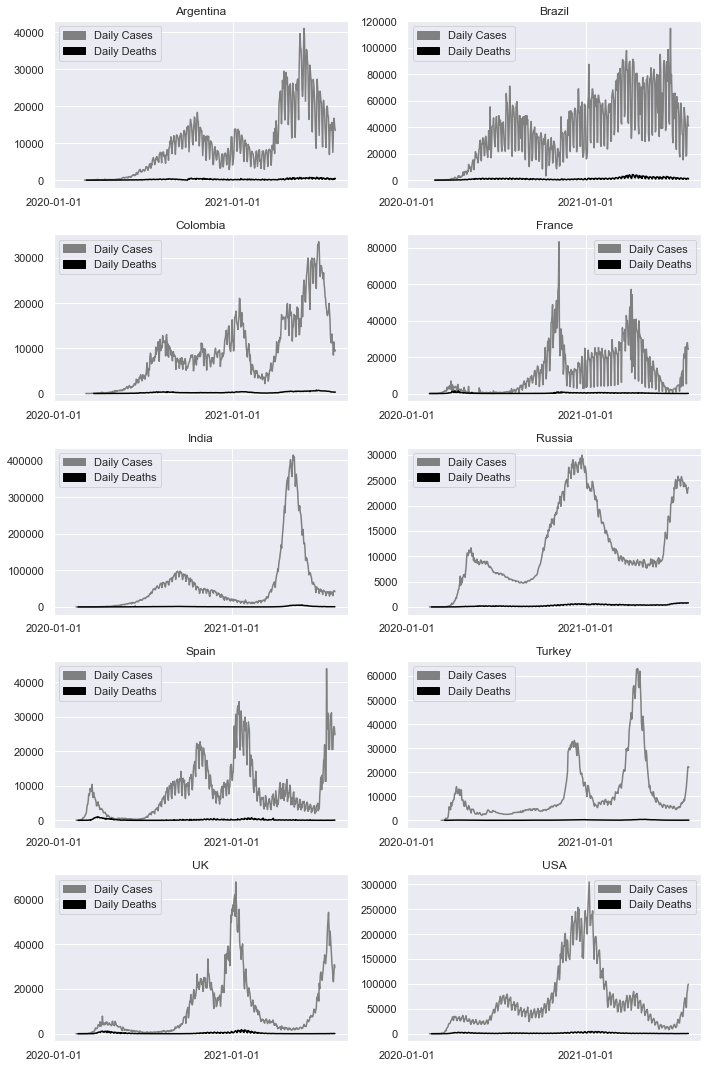

In [28]:
top_countries = corona.loc[corona['country'].isin(summary.sort_values('total_confirmed', 
                                                                      ascending= False).reset_index()['country'][:10])]

plt.figure(figsize= (10, 15))

i = 1
for country in top_countries['country'].unique():
    
    data = top_countries.loc[top_countries['country'] == country]
    
    plt.subplot(5, 2, i)
    sns.lineplot(x = data['date'],
                y = data['daily_new_cases'],
                color= 'gray')


    sns.lineplot(x = data['date'],
                y = data['daily_new_deaths'],
                color= 'black')
    
    plt.title(str(country))
    plt.xticks(['2020', '2021'])
    plt.ylabel('')
    plt.xlabel('')
    
    i += 1

    cases_patch = mpatches.Patch(color='gray', label='Daily Cases')
    deaths_patch = mpatches.Patch(color='black', label='Daily Deaths')
    plt.legend(handles=[cases_patch, deaths_patch])
    
plt.tight_layout()
plt.show()

In [29]:
plt.figure(figsize= (7, 9))

plt.subplot(2, 1, 1)
ax = sns.barplot(x= summary['country'], 
            y= summary['total_deaths'],
            order= summary.sort_values('total_deaths', ascending= False)['country'][:10],
            )
plt.title('TOTAL DEATHS PER COUNTRY', size= 22)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)


for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    
    plt.text(x + 0.15, y + height * 1.01, '{}k'.format(int(height/1000)), size= 10)

plt.subplot(2, 1, 2)
sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_deaths', ascending= False)['country'][:10], 
            color= 'gray')
   
sns.barplot(x= summary['country'], 
            y= summary['total_deaths'],
            order= summary.sort_values('total_deaths', ascending= False)['country'][:10], 
            color= 'black')

plt.title('TOTAL DEATHS X TOTAL CONFIRMED', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

    
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
deaths_patch = mpatches.Patch(color='black', label='Total Deaths')
plt.legend(handles=[cases_patch, deaths_patch])
plt.subplots_adjust(hspace=0.5)

plt.show()

In [30]:
top_countries = corona.loc[corona['country'].isin(summary.sort_values('total_deaths', ascending= False).reset_index()['country'][:10])]

plt.figure(figsize= (10, 15))

i = 1
for country in top_countries['country'].unique():
    
    data = top_countries.loc[top_countries['country'] == country]
    
    plt.subplot(5, 2, i)
    sns.lineplot(x = data['date'],
                y = data['daily_new_deaths'],
                color= 'steelblue')
    
    plt.title(str(country))
    plt.xticks(['2020', '2021'])
    plt.ylabel('')
    plt.xlabel('')
    
    i += 1

    deaths_patch = mpatches.Patch(color='steelblue', label='Daily Deaths')
    plt.legend(handles=[deaths_patch])
    
plt.tight_layout()
plt.show()

In [31]:
plt.figure(figsize= (7, 9))

plt.subplot(2, 1, 1)
ax = sns.barplot(x= summary['country'], 
            y= summary['total_recovered'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10],
            )
plt.title('TOTAL RECOVERED PER COUNTRY', size= 22)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.15, y + height * 1.01, '{}M'.format(int(height/1000000)), size= 10)

plt.subplot(2, 1, 2)
sns.barplot(x= summary['country'], 
            y= summary['total_confirmed'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'gray')
   
sns.barplot(x= summary['country'], 
            y= summary['total_recovered'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'lightblue')

sns.barplot(x= summary['country'], 
            y= summary['total_deaths'],
            order= summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'black')

plt.title('TOTAL RECOVERED X TOTAL CONFIRMED', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

    
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
recovered_patch = mpatches.Patch(color='lightblue', label='Total Recovered')
deaths_patch = mpatches.Patch(color='black', label='Total Deaths')
plt.legend(handles=[cases_patch, recovered_patch, deaths_patch])
plt.subplots_adjust(hspace=0.5)

    
plt.show()

In [32]:
import plotly.express as ex
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly
from datetime import datetime
pyo.init_notebook_mode()
plotly.io.orca.config.save()

In [33]:
title = 'Percentage of the Vaccinated Population per Country'
fig = ex.choropleth(df_country, locations="country", 
                    locationmode='country names',
                    color="people_vaccinated_per_hundred", 
                    hover_name="country", 
                    title='Percentage of the Vaccinated Population',
                    color_continuous_scale= ex.colors.sequential.RdBu,
                    width= 800,
                    height= 400
                   )

fig.update_layout(title=title, 
                  title_x= 0.5)
fig.show()


In [34]:
title = 'Used Vaccines Distribuition'
fig = ex.choropleth(df_vaccines, locations="country", 
                    locationmode='country names',
                    color="vaccine",
                    facet_col = 'vaccine',
                    facet_col_wrap = 4,
                    facet_col_spacing = 0.002,
                    title='Used Vaccines Distribuition',
                    color_continuous_scale= ex.colors.sequential.RdBu,
                    width= 1200,
                    height= 800
                   )

fig.update_layout(title=title, 
                  title_x= 0.5)

fig.show()

In [36]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, x= 'total_vaccinations', y= 'country',
            order= df_country.sort_values('total_vaccinations', ascending= False)['country'][:15],
            palette= 'GnBu_r')

plt.title('Top 15 Total Vaccinations per Country', size= 18)
plt.xlabel('Total Vaccinations', size= 15)
plt.ylabel('Country', size=15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()


    
    plt.text(width + x, height + y, '{:.1f} M'.format(int(width)/1000000))


plt.show()

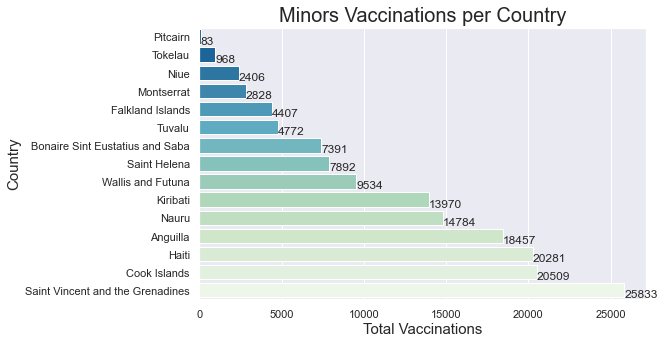

In [37]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, x= 'total_vaccinations', y= 'country',
           order= df_country.sort_values('total_vaccinations')['country'][:15],
            palette= 'GnBu_r')

plt.title('Minors Vaccinations per Country', size= 20)
plt.xlabel('Total Vaccinations', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{}'.format(int(width)))

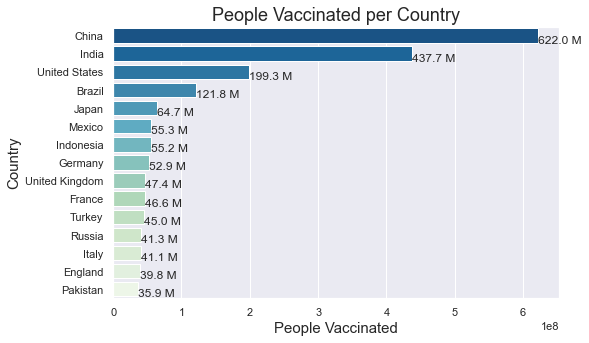

In [38]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, y= 'country', x= 'people_vaccinated',
                order= df_country.sort_values('people_vaccinated', ascending= False)['country'][:15],
                palette= 'GnBu_r')

plt.title('People Vaccinated per Country', size= 18)
plt.xlabel('People Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} M'.format(int(width)/1000000))


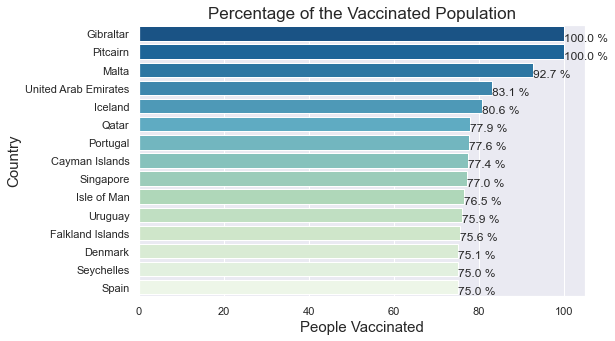

In [39]:
plt.figure(figsize= (8, 5))


ax = sns.barplot(data= df_country, y= 'country', x= 'people_vaccinated_per_hundred',
                order= df_country.sort_values('people_vaccinated_per_hundred', ascending= False)['country'][:15],
                palette= 'GnBu_r')

plt.title('Percentage of the Vaccinated Population', size= 17)
plt.xlabel('People Vaccinated', size= 15)
plt.ylabel('Country', size= 15)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} %'.format(width))


Vaccine_manufacture 

In [40]:
mf= pd.read_csv('country_vac_by_manufact.csv')
mf.head()

location        date             vaccine  total_vaccinations
0  Austria  2021-01-08     Johnson&Johnson                   0
1  Austria  2021-01-08             Moderna                   0
2  Austria  2021-01-08  Oxford/AstraZeneca                   0
3  Austria  2021-01-08     Pfizer/BioNTech               31036
4  Austria  2021-01-15     Johnson&Johnson                   0

In [41]:
mf.isna().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [42]:
mf['date']=pd.to_datetime(mf['date'])

<AxesSubplot:>

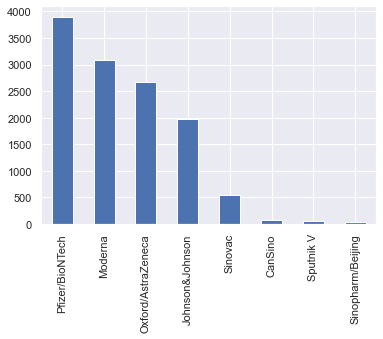

In [43]:
mf['vaccine'].value_counts().plot(kind='bar')

Widely used vaccines in world:

In [45]:
import plotly.express as px

In [46]:
def get_multi_line_title(title:str, subtitle:str):
    return f"{title}<br><sub>{subtitle}</sub>"
title = get_multi_line_title("Popular Vaccines", "Vaccines being admisitered around the world")
data = df.reset_index().dropna(subset=['vaccines'])
fig = px.choropleth(data, locations="country", 
                    locationmode='country names',
                    color="vaccines", 
                    hover_name="country", 
                   )


fig.update_layout(title=title, 
                  title_x=0.5,
    legend_orientation = 'h'
)
fig.show()

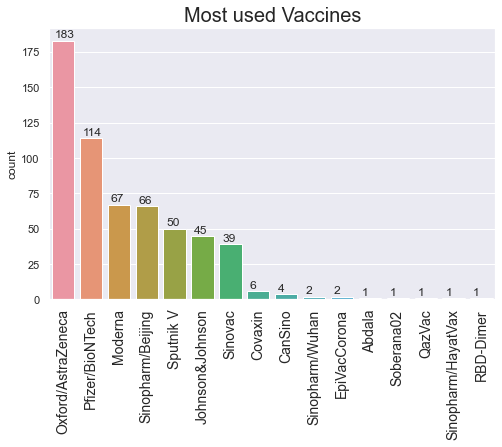

In [47]:
sns.set_theme()
plt.figure(figsize= (8, 5))
ax = sns.countplot(df_vaccines['vaccine'], order= df_vaccines['vaccine'].value_counts().index)

plt.title('Most used Vaccines', size= 20)
plt.xlabel(None)
plt.xticks(rotation= 90, size= 14)

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.1, y + height + 2, '{}'.format(height))
    
plt.show()
